In [0]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
%matplotlib inline

In [70]:
da=pd.read_csv('/content/ratings.csv')
da.head()

,Const,Your Rating,Date Rated,Title,URL,Title Type,IMDb Rating,Runtime (mins),Year,Genres,Num Votes,Release Date,Directors
0,tt1022603,10,2017-12-05,(500) Days of Summer,https://www.imdb.com/title/tt1022603/,movie,7.7,95.0,2009,"Comedy, Drama, Romance",457096,2009-01-17,Marc Webb
1,tt1024648,9,2018-07-31,Argo,https://www.imdb.com/title/tt1024648/,movie,7.7,120.0,2012,"Biography, Drama, Thriller",555233,2012-08-31,Ben Affleck
2,tt0102926,7,2020-04-21,The Silence of the Lambs,https://www.imdb.com/title/tt0102926/,movie,8.6,118.0,1991,"Crime, Drama, Thriller",1205163,1991-01-30,Jonathan Demme
3,tt1034007,10,2017-12-22,Alias Grace,https://www.imdb.com/title/tt1034007/,tvMiniSeries,7.8,60.0,2017,"Biography, Crime, Drama, Thriller",21860,2017-09-12,NaN
4,tt10422436,10,2019-12-04,Silicon Valley: RussFest,https://www.imdb.com/title/tt10422436/,tvEpisode,8.6,34.0,2019,Comedy,954,2019-12-01,Matt Ross


In [71]:
da=da[['Your Rating','Title','Title Type', 'IMDb Rating', 'Runtime (mins)','Year', 'Genres','Directors']]
da.head()

,Your Rating,Title,Title Type,IMDb Rating,Runtime (mins),Year,Genres,Directors
0,10,(500) Days of Summer,movie,7.7,95.0,2009,"Comedy, Drama, Romance",Marc Webb
1,9,Argo,movie,7.7,120.0,2012,"Biography, Drama, Thriller",Ben Affleck
2,7,The Silence of the Lambs,movie,8.6,118.0,1991,"Crime, Drama, Thriller",Jonathan Demme
3,10,Alias Grace,tvMiniSeries,7.8,60.0,2017,"Biography, Crime, Drama, Thriller",NaN
4,10,Silicon Valley: RussFest,tvEpisode,8.6,34.0,2019,Comedy,Matt Ross


In [72]:
da['Title Type'].isnull().sum()

0

In [73]:
da['Title Type'].unique()

array(['movie', 'tvMiniSeries', 'tvEpisode', 'tvSeries', 'video',
       'tvMovie'], dtype=object)

In [74]:
da['Title Type'].replace({'tvMiniSeries':'tvSeries','tvMovie':'movie','video':'movie'},inplace=True)
da['Title Type'].unique()

array(['movie', 'tvSeries', 'tvEpisode'], dtype=object)

In [75]:
da.drop([4,180,192],inplace=True,axis=0)
da['Title Type'].unique()

array(['movie', 'tvSeries'], dtype=object)

In [76]:
da.head()

,Your Rating,Title,Title Type,IMDb Rating,Runtime (mins),Year,Genres,Directors
0,10,(500) Days of Summer,movie,7.7,95.0,2009,"Comedy, Drama, Romance",Marc Webb
1,9,Argo,movie,7.7,120.0,2012,"Biography, Drama, Thriller",Ben Affleck
2,7,The Silence of the Lambs,movie,8.6,118.0,1991,"Crime, Drama, Thriller",Jonathan Demme
3,10,Alias Grace,tvSeries,7.8,60.0,2017,"Biography, Crime, Drama, Thriller",NaN
5,10,Silver Linings Playbook,movie,7.7,122.0,2012,"Comedy, Drama, Romance",David O. Russell


In [0]:
from pandas import Series, DataFrame
s = da['Genres'].str.split(',').apply(Series,1).stack()
s.index = s.index.droplevel(-1)
s.name = 'Genres'
del da['Genres']
da = da.join(s)


In [78]:
da.head()

,Your Rating,Title,Title Type,IMDb Rating,Runtime (mins),Year,Directors,Genres
0,10,(500) Days of Summer,movie,7.7,95.0,2009,Marc Webb,Comedy
0,10,(500) Days of Summer,movie,7.7,95.0,2009,Marc Webb,Drama
0,10,(500) Days of Summer,movie,7.7,95.0,2009,Marc Webb,Romance
1,9,Argo,movie,7.7,120.0,2012,Ben Affleck,Biography
1,9,Argo,movie,7.7,120.0,2012,Ben Affleck,Drama


In [79]:
gp_obj1 = da.groupby('Genres')
gp_obj1.groups

{' Action': Int64Index([89], dtype='int64'),
 ' Adventure': Int64Index([ 16,  31,  33,  37,  39,  40,  43,  44,  45,  48,  55,  61,  62,
              65,  69,  70,  71,  73,  80,  88,  89,  90,  98, 103, 105, 107,
             109, 116, 121, 126, 127, 130, 131, 136, 137, 138, 140, 141, 155,
             159, 184, 185, 188, 189, 196, 199, 200, 204, 206, 209, 210],
            dtype='int64'),
 ' Biography': Int64Index([120, 156, 183], dtype='int64'),
 ' Comedy': Int64Index([44, 73, 103, 121, 130, 131, 155, 159, 178, 201], dtype='int64'),
 ' Crime': Int64Index([  3,  33,  68,  72,  84,  85, 100, 104, 112, 113, 117, 118, 128,
             142, 146, 169, 185, 186, 214],
            dtype='int64'),
 ' Drama': Int64Index([  0,   1,   2,   3,   5,   6,   9,  12,  17,  19,  21,  22,  23,
              24,  25,  27,  30,  31,  34,  41,  46,  52,  53,  58,  60,  61,
              68,  72,  74,  75,  76,  79,  82,  83,  84,  85,  86,  91,  92,
              94,  97,  99, 100, 102, 106, 107, 108, 

In [80]:
da.shape

(638, 8)

In [0]:

da_movie=da[da['Title Type']=='movie']
da_tv=da[da['Title Type']=='tvSeries']


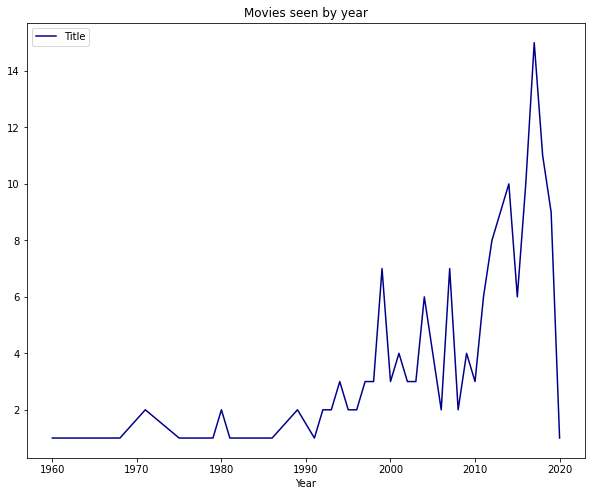

In [82]:
# Get movies seen of  year, create new data frame
da_movie_yr = pd.DataFrame(da_movie.groupby('Year').Title.nunique())
da_movie_yr.plot.line(title = 'Movies seen by year',color='DarkBlue',figsize=(10, 8));

In [83]:
da_movie_yr['year']=da_movie_yr.index
da_movie_yr.reset_index(drop=True,inplace=True)
da_movie_yr.head()

,Title,year
0,1,1960
1,1,1964
2,1,1967
3,1,1968
4,2,1971


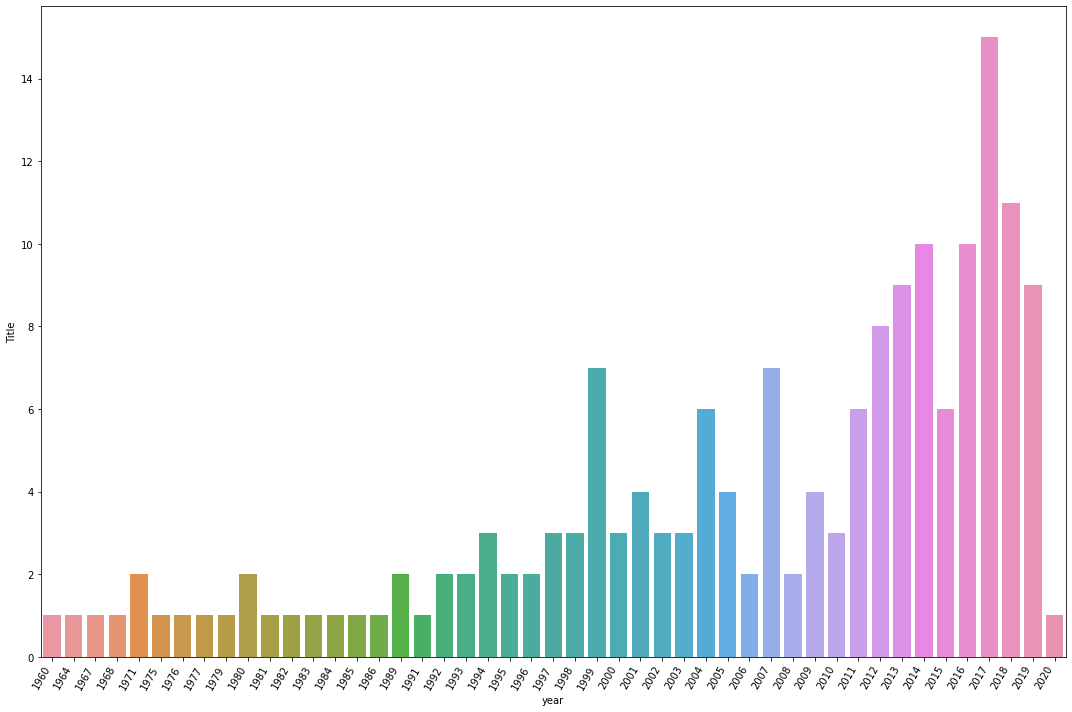

In [126]:
#barplot of movies seen by year
a4_dims = (15,10)
fig, ax = plt.subplots(figsize=a4_dims)
sns.barplot(ax=ax,y='Title',x='year',data=da_movie_yr)
ax.set_xticklabels(ax.get_xticklabels(), rotation=60, ha="right")
plt.tight_layout()
from google.colab import files
plt.savefig('movies_seen_as_yr.pdf')
files.download('movies_seen_as_yr.pdf')
plt.show()

In [0]:
da_movies_genres = (pd.DataFrame(da_movies.groupby('Genres').Title.nunique())).sort_values('Title',ascending=False)

In [100]:
da_movies_genres.head()

,Title
Genres,
Drama,68
Action,58
Sci-Fi,50
Adventure,47
Thriller,40


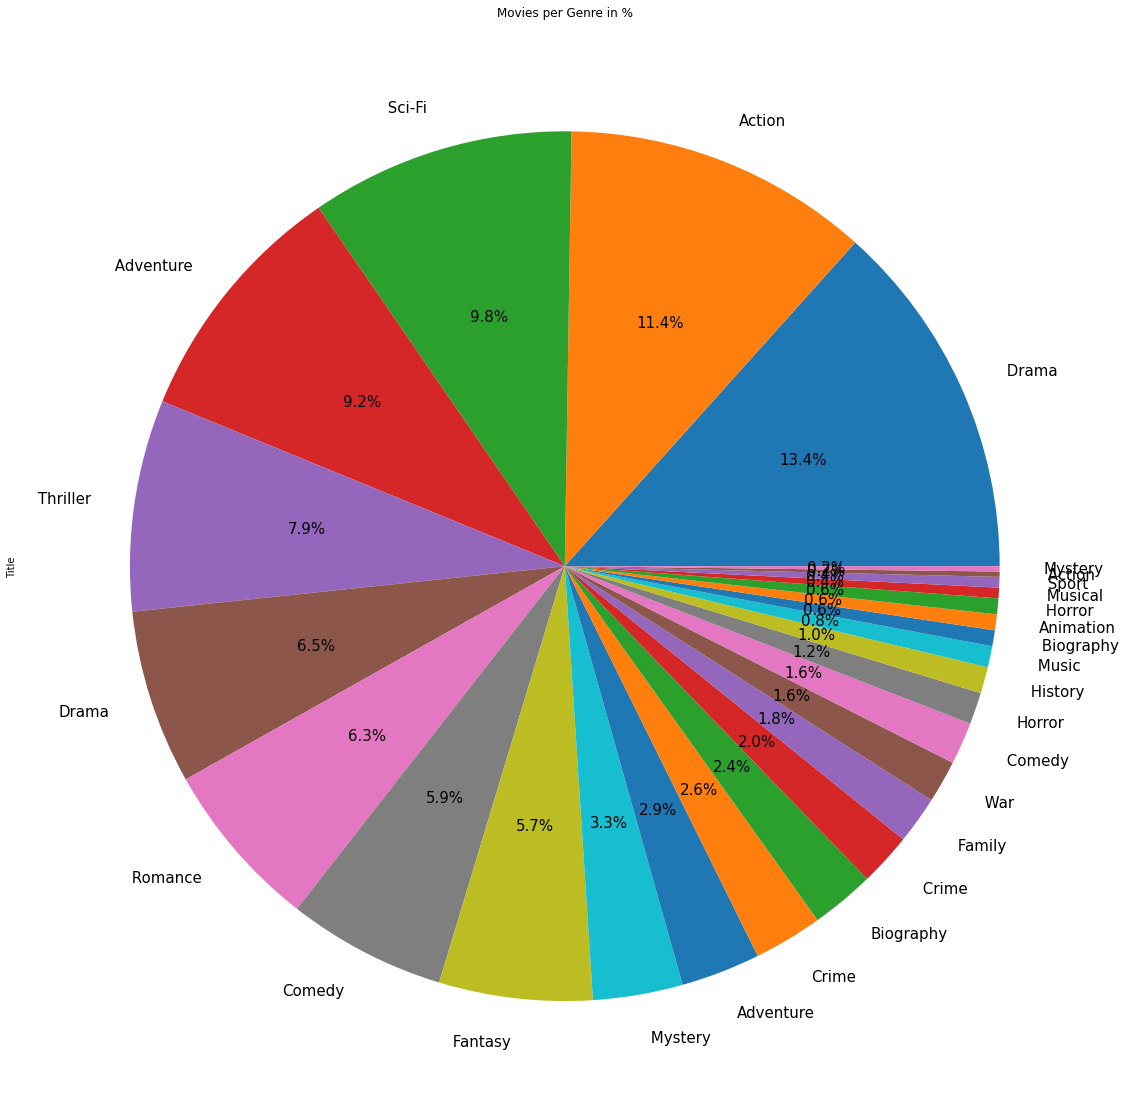

In [121]:
da_movies_genres['Title'].plot.pie(title= 'Movies per Genre in %', figsize=(20,20), autopct='%1.1f%%',fontsize=15)
from google.colab import files
plt.savefig('movies_genres.pdf')
files.download('movies_genres.pdf')

In [0]:
watch_type = (pd.DataFrame(da.groupby('Title Type').Title.nunique())).sort_values('Title',ascending=False)

In [106]:
watch_type

,Title
Title Type,
movie,171
tvSeries,41


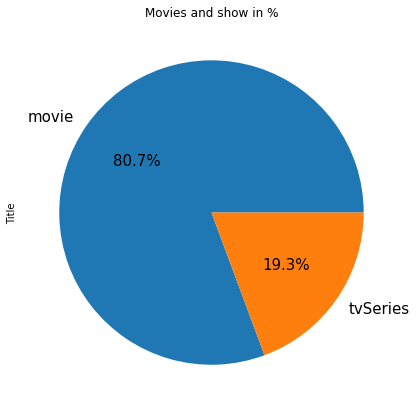

In [107]:
watch_type['Title'].plot.pie(title= 'Movies and show in %', figsize=(7,7), autopct='%1.1f%%',fontsize=15);

In [108]:
da_movies.head()

,Your Rating,Title,Title Type,IMDb Rating,Runtime (mins),Year,Directors,Genres
0,10,(500) Days of Summer,movie,7.7,95.0,2009,Marc Webb,Comedy
0,10,(500) Days of Summer,movie,7.7,95.0,2009,Marc Webb,Drama
0,10,(500) Days of Summer,movie,7.7,95.0,2009,Marc Webb,Romance
1,9,Argo,movie,7.7,120.0,2012,Ben Affleck,Biography
1,9,Argo,movie,7.7,120.0,2012,Ben Affleck,Drama


In [109]:
da_movie['duration']=pd.to_numeric(da_movie['Runtime (mins)'])
da_movie.head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,Your Rating,Title,Title Type,IMDb Rating,Runtime (mins),Year,Directors,Genres,duration
0,10,(500) Days of Summer,movie,7.7,95.0,2009,Marc Webb,Comedy,95.0
0,10,(500) Days of Summer,movie,7.7,95.0,2009,Marc Webb,Drama,95.0
0,10,(500) Days of Summer,movie,7.7,95.0,2009,Marc Webb,Romance,95.0
1,9,Argo,movie,7.7,120.0,2012,Ben Affleck,Biography,120.0
1,9,Argo,movie,7.7,120.0,2012,Ben Affleck,Drama,120.0


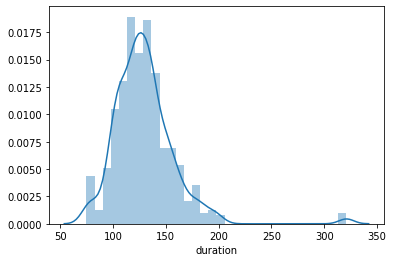

In [110]:
sns.distplot(da_movie['duration'])

In [111]:
da_movie['duration'].describe()

count    509.000000
mean     129.640472
std       29.492332
min       75.000000
25%      110.000000
50%      127.000000
75%      141.000000
max      321.000000
Name: duration, dtype: float64

In [112]:
da[['Your Rating','IMDb Rating']].corr()

,Your Rating,IMDb Rating
Your Rating,1.000000,0.234653
IMDb Rating,0.234653,1.000000


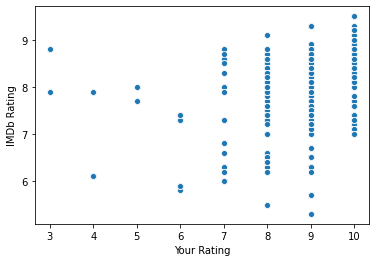

In [122]:
sns.scatterplot(x='Your Rating',y='IMDb Rating',data=da)
from google.colab import files
plt.savefig('my_rating_vs_imdb.pdf')
files.download('my_rating_vs_imdb.pdf')

In [0]:
direcor_type = (pd.DataFrame(da.groupby('Directors').Title.nunique())).sort_values('Title',ascending=False)

In [118]:
direcor_type.head()

,Title
Directors,
Steven Spielberg,7
Christopher Nolan,6
Stanley Kubrick,5
Francis Lawrence,4
Robert Zemeckis,3
